Geoinformatik 2 – GIS-Analyse
# Übung 10: Lokale Räumliche Autokorrelation
Prof. Dr. Yu Feng

In [ ]:
# Grafiken
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
import contextily

# Analyse
import geopandas
import pandas
from pysal.explore import esda

# Teil 1: Lokale Räumliche Autokorrelation (Local Moran's I)

In diesem Teil berechnen wir den **Local Moran's I** für jeden Beobachtungspunkt:
- Zuerst implementieren Sie die Formel selbst (manuell)
- Danach vergleichen wir mit dem Ergebnis aus der PySAL-Bibliothek

Ziel: Verstehen, wie lokale räumliche Cluster (High-High, Low-Low, High-Low, Low-High) entstehen.

# Teil 1: Lokale Moran's I (Einfaches Beispiel)
## 1.1 Beispieldatensatz

Wir erstellen einen einfachen 6x6 Gitter-Datensatz mit Werten von 1 bis 9. Dies ermöglicht es uns, die Berechnung nachzuvollziehen.

In [72]:
import numpy as np

# Erstelle einen 6x6 Gitter mit Werten
# Die Werte sind räumlich organisiert: hohe Werte oben links, niedrige Werte unten rechts
data = np.array([
    [9, 7, 8, 5, 4, 4],
    [9, 7, 8, 5, 4, 4],
    [9, 8, 9, 5, 4, 6],
    [6, 6, 4, 6, 4, 5],
    [4, 5, 4, 4, 3, 3],
    [6, 6, 5, 6, 2, 1]
])

print("Datenwerte (6x6 Gitter):")
print(data)
print(f"\nMittelwert: {data.mean():.2f}")
print(f"Standardabweichung: {data.std():.2f}")

Datenwerte (6x6 Gitter):
[[9 7 8 5 4 4]
 [9 7 8 5 4 4]
 [9 8 9 5 4 6]
 [6 6 4 6 4 5]
 [4 5 4 4 3 3]
 [6 6 5 6 2 1]]

Mittelwert: 5.42
Standardabweichung: 1.99


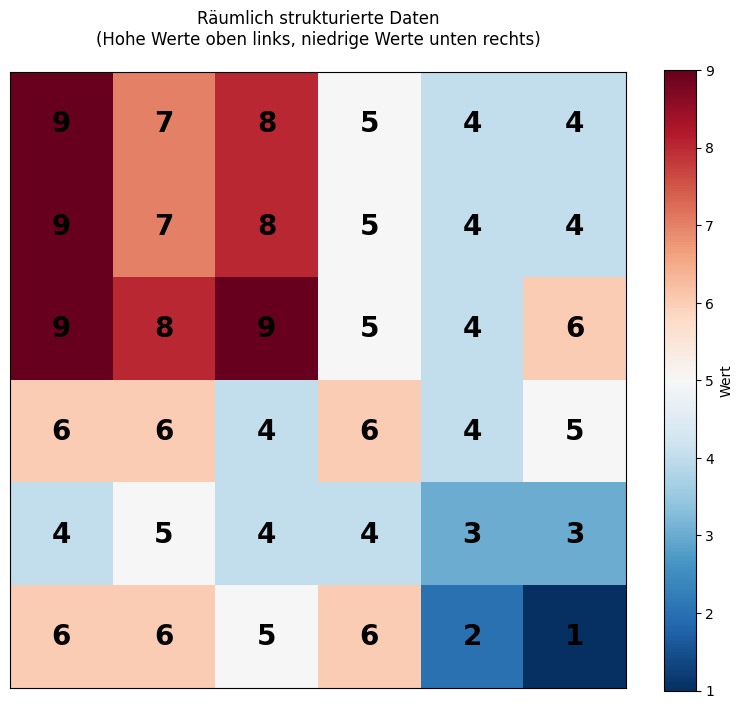

In [73]:
# Visualisierung der Daten
fig, ax = plt.subplots(figsize=(8, 7))
im = ax.imshow(data, cmap='RdBu_r', vmin=1, vmax=9)

# Werte in jede Zelle schreiben
for i in range(6):
    for j in range(6):
        text = ax.text(j, i, data[i, j], ha="center", va="center", 
                      color="black", fontsize=20, fontweight='bold')

ax.set_title('Räumlich strukturierte Daten\n(Hohe Werte oben links, niedrige Werte unten rechts)', 
             fontsize=12, pad=20)
plt.colorbar(im, ax=ax, label='Wert')
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()

## 1.2 Räumliche Gewichtsmatrix (Spatial Weights)

Wir verwenden **Queen-Nachbarschaft** (8 Nachbarn inkl. Diagonalen) und **Reihen-Standardisierung** (jede Zeile summiert sich zu 1) für das 6x6-Gitter.

In [74]:
# Queen-Nachbarschaft für ein 6x6 Gitter erstellen
from pysal.lib import weights
w_grid = weights.lat2W(6, 6, rook=False)
w_grid.transform = 'R'  # Reihen-Standardisierung

print(f"Anzahl der Zellen: {w_grid.n}")
print(f"Durchschnittliche Anzahl Nachbarn: {w_grid.mean_neighbors:.2f}")
print(f"\nBeispiel - Nachbarn von Zelle 0 (oben links):")
print(f"  Nachbarn: {w_grid.neighbors[0]}")
print(f"  Gewichte: {w_grid.weights[0]}")

Anzahl der Zellen: 36
Durchschnittliche Anzahl Nachbarn: 6.11

Beispiel - Nachbarn von Zelle 0 (oben links):
  Nachbarn: [6, 1, 7]
  Gewichte: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


## 1.3 Local Moran's I

Der lokale Moran's I ($I_i$) ermöglicht es uns, räumliche Cluster und Ausreißer auf lokaler Ebene zu identifizieren. Die **klassische Definition** (nach Anselin, 1995) lautet:

$$ I_i = \frac{x_i - \bar{x}}{s^2} \sum_{j} w_{ij} (x_j - \bar{x}) $$

Wobei:
*   $x_i$ der Wert der Variable an der Stelle $i$ ist.
*   $\bar{x}$ der Mittelwert ist.
*   $w_{ij}$ das räumliche Gewicht ist.
*   $s^2 = \frac{\sum (x_i - \bar{x})^2}{n}$ die Varianz (Population) ist.

**Hinweis zur Varianz (Unverzerrte Schätzung):**
In neueren Forschungen und Software-Implementierungen (wie PySAL) wird häufig der **unverzerrte Schätzer** (unbiased estimator) für die Varianz bevorzugt. Dabei wird im Nenner $n$ durch $n-1$ ersetzt:

$$ s^2 = \frac{\sum (x_i - \bar{x})^2}{n - 1} $$

Dies entspricht der Stichprobenvarianz. Wenn wir diese zur Standardisierung verwenden, erhalten wir leicht abweichende, aber statistisch robustere Ergebnisse für kleine Stichproben.

**Interpretation:**
*   **Positives $I_i$**: Ein Wert ist von ähnlichen Werten umgeben (Cluster).
    *   High-High (HH) oder Low-Low (LL).
*   **Negatives $I_i$**: Ein Wert ist von unähnlichen Werten umgeben (Ausreißer).
    *   High-Low (HL) oder Low-High (LH).

In [ ]:
# Daten in Vektorform umwandeln
y = data.flatten()
mean_y = y.mean()

########### TODO: Ihre Implementierung hier ##############

# S2 = 

# diffs =  

# I_manual = np.zeros(len(y))

# for i in range(len(y)):
    
    # Spatial Lag der Abweichungen
    
    # I_manual[i] = 

# I_manual

array([ 1.9767951 ,  1.08051177,  0.62283518, -0.03916132,  0.35313291,
        0.49207044,  2.26965363,  1.14844814,  0.84452228, -0.04682331,
        0.27498054,  0.35313291,  1.56679315,  1.16121814,  0.62232438,
       -0.00851333,  0.18814458, -0.17401245,  0.1406402 ,  0.10130862,
       -0.15919926, -0.11322728,  0.31839852,  0.1447266 , -0.13314847,
        0.02979665,  0.05789064,  0.40523448,  0.91348025,  1.43194201,
       -0.05959331, -0.08819809,  0.04256665, -0.25982681,  1.68938509,
        2.97796264])

**Vergleich: Manuelle Berechnung vs. PySAL**

Nun vergleichen wir die Ergebnisse unserer manuellen Berechnung mit denen der PySAL-Bibliothek, um sicherzustellen, dass unsere Implementierung korrekt ist.

In Python können wir LISAs dank `esda` sehr effizient berechnen. Um lokale Moran-Statistiken zu berechnen, verwenden wir die Funktion `Moran_Local` (https://pysal.org/esda/generated/esda.Moran_Local.html):

In [ ]:
# Vergleich mit der PySAL-Bibliothek

########### TODO: Ihre Implementierung hier ##############
# PySAL Berechnung (Moran_Local)
# lisa = 

print("Vergleich der Ergebnisse (Manuell vs. PySAL):")
print(f"{'Index':<6} | {'Manuell':<12} | {'PySAL':<12} | {'Differenz':<12}")
print("-" * 50)

# Vergleich der ersten 10 Werte
for i in range(10):
    val_manual = I_manual[i]
    val_pysal = lisa.Is[i]
    diff = abs(val_manual - val_pysal)
    print(f"{i:<6} | {val_manual:<12.6f} | {val_pysal:<12.6f} | {diff:<12.2e}")

max_diff = np.max(np.abs(I_manual - lisa.Is))
print(f"\nMaximale Differenz über alle Zellen: {max_diff:.2e}")

if np.allclose(I_manual, lisa.Is):
    print("✓ Die manuelle Berechnung stimmt exakt mit PySAL überein.")
else:
    print("✗ Es gibt Abweichungen.")

Vergleich der Ergebnisse (Manuell vs. PySAL):
Index  | Manuell      | PySAL        | Differenz   
--------------------------------------------------
0      | 1.976795     | 1.976795     | 4.44e-16    
1      | 1.080512     | 1.080512     | 0.00e+00    
2      | 0.622835     | 0.622835     | 2.22e-16    
3      | -0.039161    | -0.039161    | 1.39e-17    
4      | 0.353133     | 0.353133     | 0.00e+00    
5      | 0.492070     | 0.492070     | 0.00e+00    
6      | 2.269654     | 2.269654     | 4.44e-16    
7      | 1.148448     | 1.148448     | 0.00e+00    
8      | 0.844522     | 0.844522     | 1.11e-16    
9      | -0.046823    | -0.046823    | 6.94e-18    

Maximale Differenz über alle Zellen: 4.44e-16
✓ Die manuelle Berechnung stimmt exakt mit PySAL überein.


#### Zusammenhang mit dem Global Moran's I

Nun wollen wir untersuchen, wie die lokalen Moran's I Werte mit dem globalen Moran's I zusammenhängen. Der globale Moran's I lässt sich nämlich aus den lokalen Werten ableiten.

Die Beziehung lautet:

$$ I = \frac{n}{S_0} \cdot\frac{\sum_{i=1}^{n} I_i}{\sum_{i=1}^{n} z_i^2} $$

Wobei $z_i$ der standardisierte Wert ist:
$$ z_i = \frac{x_i - \bar{x}}{s} $$

Wenn wir (wie in PySAL üblich) **z-Scores basierend auf der Stichproben-Standardabweichung** verwenden, gilt $\sum z_i^2 = n-1$.
Zudem ist bei **zeilenstandardisierten Gewichten** die Summe aller Gewichte $S_0 = n$.

Damit vereinfacht sich die Formel zu:

$$ I = \frac{\sum_{i=1}^{n} I_i}{n - 1} $$

Das bedeutet: Der globale Moran's I entspricht der Summe der lokalen Moran's I Werte, geteilt durch $n-1$.

In [ ]:
# Global Moran's I aus lokalen I_i (PySAL-Definition) ableiten

########### TODO: Ihre Implementierung hier ##############
# S0 = 

print(f"{'S0:':<50} {S0:.6f}")

########### TODO: Ihre Implementierung hier ##############
# I_global_from_local  = 

print("{:<50} {:.6f}".format(
    "Global Moran's I (aus lokalen Werten abgeleitet):",
    I_global_from_local
))

########### TODO: Ihre Implementierung hier ##############
# moran = 

print("{:<50} {:.6f}".format(
    "PySAL Global Moran's I:",
    moran.I
))
print("{:<50} {:.10f}".format(
    "Differenz |aus lokal - PySAL|:",
    abs(I_global_from_local - moran.I)
))


S0:                                                36.000000
Global Moran's I (aus lokalen Werten abgeleitet):  0.575034
PySAL Global Moran's I:                            0.575034
Differenz |aus lokal - PySAL|:                     0.0000000000


## 1.4 Permutationstest (Signifikanzprüfung)

Um zu entscheiden, ob ein lokaler Cluster statistisch signifikant ist, verwenden wir einen **Permutationstest**.

### Das Prinzip der bedingten Permutation (Conditional Permutation)

Da wir keine Normalverteilung annehmen können, simulieren wir eine Zufallsverteilung für jeden Ort:

1.  **Fixierung:** Wir betrachten eine Zelle $i$ und halten ihren Wert $z_i$ fest.
2.  **Permutation:** Die Werte aller anderen Zellen (der Rest des Datensatzes) werden zufällig gemischt.
3.  **Simulation:** Wir berechnen, welchen Moran's I wir mit diesen zufälligen Nachbarn erhalten würden.
4.  **Wiederholung:** Dieser Vorgang wird oft wiederholt (z.B. 999 Mal), um eine Referenzverteilung zu erstellen.

### Berechnung des p-Wertes

Wir vergleichen unseren tatsächlich beobachteten Wert $I_{obs}$ mit den 999 simulierten Werten.
*   Liegt $I_{obs}$ am extremen Rand der Verteilung (z.B. größer als 95% der Zufallswerte), ist das Ergebnis signifikant ($p < 0.05$).
*   PySAL verwendet dabei einen "Pseudo-p-Wert", der auf dem Rang des beobachteten Wertes basiert.

Im Folgenden führen wir diesen Test für alle Zellen durch und betrachten beispielhaft das Ergebnis für die erste Zelle.

In [ ]:
# Verwendung des PySAL Permutationstests

# Berechnung von Local Moran's I mit Permutationstest (999 Durchläufe)
permutations = 999

########### TODO: Ihre Implementierung hier ##############
# Wir verwenden 'y' (unsere abgeflachten Daten) und 'w_grid' (Gewichte)
# lisa_grid = 

print(f"Local Moran's I berechnet mit {permutations} Permutationen.")
print(f"Anzahl der Beobachtungen: {len(lisa_grid.Is)}")
print(f"Anzahl signifikanter Zellen (p < 0.05): {(lisa_grid.p_sim < 0.05).sum()}")

# Ergebnisse der ersten 10 Zellen anzeigen
print("\nErgebnisse der ersten 10 Zellen:")
print("\n{:>5} | {:>10} | {:>10} | {:>15}".format(
    "Zelle", "I_obs", "p_sim", "Signifikanz"))
print("-" * 50)

for i in range(10):
    is_sig = lisa_grid.p_sim[i] < 0.05
    print("{:>5d} | {:>10.6f} | {:>10.6f} | {:>15s}".format(
        i,
        lisa_grid.Is[i],
        lisa_grid.p_sim[i],
        "Signifikant ✓" if is_sig else "Nicht sig."))

Local Moran's I berechnet mit 999 Permutationen.
Anzahl der Beobachtungen: 36
Anzahl signifikanter Zellen (p < 0.05): 13

Ergebnisse der ersten 10 Zellen:

Zelle |      I_obs |      p_sim |     Signifikanz
--------------------------------------------------
    0 |   1.976795 |   0.011000 |   Signifikant ✓
    1 |   1.080512 |   0.002000 |   Signifikant ✓
    2 |   0.622835 |   0.116000 |      Nicht sig.
    3 |  -0.039161 |   0.296000 |      Nicht sig.
    4 |   0.353133 |   0.123000 |      Nicht sig.
    5 |   0.492070 |   0.053000 |      Nicht sig.
    6 |   2.269654 |   0.001000 |   Signifikant ✓
    7 |   1.148448 |   0.001000 |   Signifikant ✓
    8 |   0.844522 |   0.014000 |   Signifikant ✓
    9 |  -0.046823 |   0.189000 |      Nicht sig.


### 1.6 Visualisierung der Permutationsverteilung

Die folgenden Grafiken zeigen die Verteilung der simulierten Moran's I Werte für die ersten drei Zellen (Index 0, 1, 2).
*   **Rote Linie:** Der tatsächlich beobachtete Wert ($I_{obs}$).
*   **Graue Balken:** Die Verteilung der Werte, die durch zufälliges Mischen entstehen würden.

Wenn die rote Linie weit außerhalb der grauen Verteilung liegt, ist das Ergebnis signifikant.

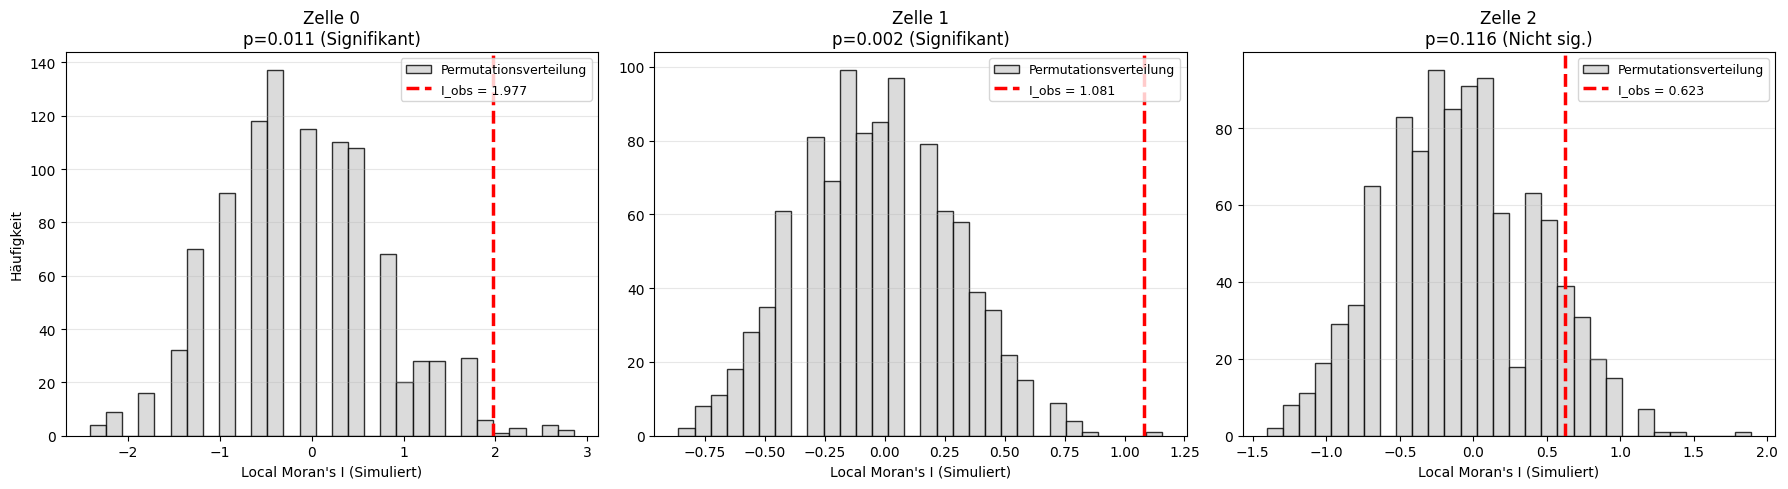

Interpretation:
- Zelle 0: p=0.0110 -> Signifikant
- Zelle 1: p=0.0020 -> Signifikant
- Zelle 2: p=0.1160 -> Nicht signifikant


In [ ]:
# Visualisierung der Verteilung für die ersten 3 Zellen
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    cell_idx = i
    ax = axes[i]
    
    ########### TODO: Ihre Implementierung hier ##############
    # Extrahiere Permutationswerte und beobachteten Wert
    # perm_values = 
    # obs_value = 
    # p_value = 
    
    is_sig = p_value < 0.05
    
    # Histogramm zeichnen
    ax.hist(perm_values, bins=30, color="lightgray", edgecolor="black", alpha=0.8, label="Permutationsverteilung")
    ax.axvline(obs_value, color="red", linewidth=2.5, linestyle="--", label=f"I_obs = {obs_value:.3f}")
    
    # Titel und Labels
    ax.set_title(f"Zelle {cell_idx}\np={p_value:.3f} ({'Signifikant' if is_sig else 'Nicht sig.'})", fontsize=12)
    ax.set_xlabel("Local Moran's I (Simuliert)")
    if i == 0:
        ax.set_ylabel("Häufigkeit")
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

# Kurze Interpretation ausgeben
print("Interpretation:")
for i in range(3):
    p_val = lisa_grid.p_sim[i]
    sig_text = "Signifikant" if p_val < 0.05 else "Nicht signifikant"
    print(f"- Zelle {i}: p={p_val:.4f} -> {sig_text}")

## 1.5 Details zur PySAL Permutationsmethode

### Wie PySAL den p-Wert berechnet

PySAL verwendet eine **bedingte Permutation** (conditional permutation).

**Der Algorithmus:**
1.  **Simulation:** Für jeden Ort werden 999 zufällige Nachbarschaftskonstellationen simuliert.
2.  **Vergleich:** Es wird gezählt, wie oft der simulierte Wert extremer ist als der beobachtete Wert.
3.  **Pseudo p-Wert:**
    $$ p = \frac{R + 1}{M + 1} $$
    *   $R$: Anzahl der extremeren simulierten Werte.
    *   $M$: Anzahl der Permutationen (z.B. 999).
    *   Die "+1" kommt daher, dass der beobachtete Wert selbst als Teil der Verteilung betrachtet wird (konservativer Ansatz).

## 1.7 Visualisierung der Ergebnisse (LISA Cluster Map)

Zum Abschluss von Teil 1 visualisieren wir die Ergebnisse auf unserem 6x6 Gitter.
Wir erstellen drei Karten:
1.  **Local Moran's I**: Die berechneten Werte.
2.  **Signifikanz**: Die p-Werte aus dem Permutationstest.
3.  **LISA Cluster Map**: Die Kombination aus Signifikanz und Quadrant (HH, LL, etc.).

**Cluster-Typen:**
*   **High-High (Rot):** Hohe Werte umgeben von hohen Werten (Hotspot).
*   **Low-Low (Blau):** Niedrige Werte umgeben von niedrigen Werten (Coldspot).
*   **High-Low / Low-High:** Ausreißer.
*   **Grau:** Nicht signifikant.

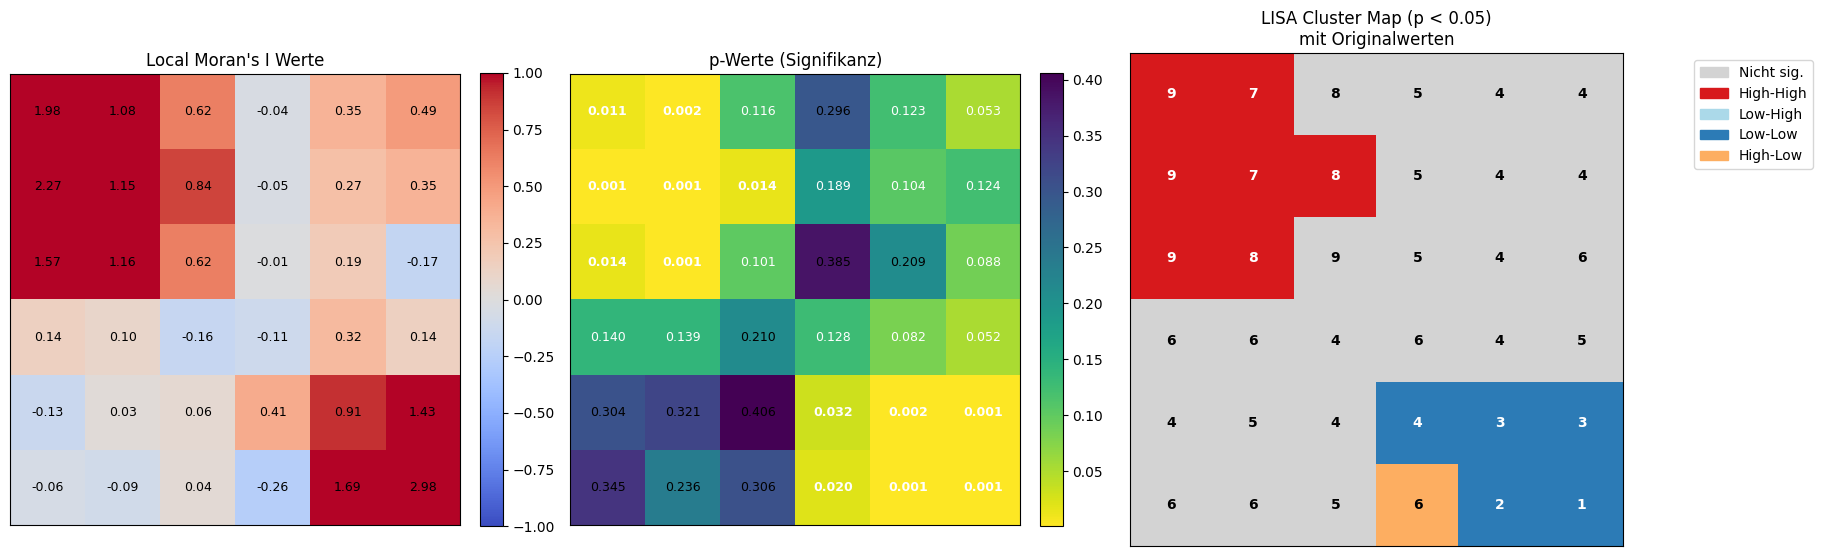

In [ ]:
from matplotlib.colors import ListedColormap

########### TODO: Ihre Implementierung hier ##############
# Ergebnisse in 6x6 Gitter umformen
results_I = lisa_grid.Is.reshape(6, 6)
# results_p = 
# results_q = 

# Maske für signifikante Werte (p < 0.05)
sig = results_p < 0.05

# Cluster Map erstellen (0=nicht sig, 1=HH, 2=LH, 3=LL, 4=HL)
cluster_map = results_q * sig

# Farben definieren: Grau (ns), Rot (HH), Hellblau (LH), Dunkelblau (LL), Orange (HL)
# Indizes: 0, 1, 2, 3, 4
colors = ['lightgrey', '#d7191c', '#abd9e9', '#2c7bb6', '#fdae61']
cmap_clusters = ListedColormap(colors)
labels_clusters = ['Nicht sig.', 'High-High', 'Low-High', 'Low-Low', 'High-Low']

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 1. Local Moran's I Werte
im1 = axs[0].imshow(results_I, cmap='coolwarm', vmin=-1, vmax=1)
axs[0].set_title("Local Moran's I Werte")
for i in range(6):
    for j in range(6):
        axs[0].text(j, i, f"{results_I[i,j]:.2f}", ha="center", va="center", fontsize=9)
plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

# 2. p-Werte
im2 = axs[1].imshow(results_p, cmap='viridis_r')
axs[1].set_title("p-Werte (Signifikanz)")
for i in range(6):
    for j in range(6):
        # Fettgedruckt wenn signifikant
        fw = 'bold' if results_p[i,j] < 0.05 else 'normal'
        col = 'white' if results_p[i,j] < 0.2 else 'black' # Kontrast anpassen
        axs[1].text(j, i, f"{results_p[i,j]:.3f}", ha="center", va="center", fontsize=9, fontweight=fw, color=col)
plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

# 3. LISA Cluster Map
im3 = axs[2].imshow(cluster_map, cmap=cmap_clusters, vmin=0, vmax=4)
axs[2].set_title("LISA Cluster Map (p < 0.05)\nmit Originalwerten")

# Originalwerte anzeigen
for i in range(6):
    for j in range(6):
        # Textfarbe anpassen für bessere Lesbarkeit
        # Dunkle Farben (Rot, Blau) brauchen weißen Text
        # Helle Farben (Hellblau, Orange, Grau) brauchen schwarzen Text
        # Cluster codes: 0=ns(grau), 1=HH(rot), 2=LH(hellblau), 3=LL(dunkelblau), 4=HL(orange)
        cluster_code = cluster_map[i, j]
        col = 'white' if cluster_code in [1, 3] else 'black'
        axs[2].text(j, i, f"{data[i,j]}", ha="center", va="center", fontsize=10, fontweight='bold', color=col)

# Legende für Cluster Map
import matplotlib.patches as mpatches
patches = [mpatches.Patch(color=colors[i], label=labels_clusters[i]) for i in range(len(colors))]
axs[2].legend(handles=patches, loc='upper right', bbox_to_anchor=(1.4, 1))

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# Teil 2: Anwendung auf Reale Daten (Brexit)

In diesem Teil wenden wir denselben Analyseablauf wie in Teil 1 auf einen realen räumlichen Datensatz an: die **Brexit-Abstimmungsergebnisse** in Großbritannien (2016).

**Ziel:** Untersuchen Sie, ob es räumliche Muster in der Abstimmung gibt (d.h., sind Regionen mit hohen Leave-Anteilen räumlich geclustert? Zeigen sich räumliche Cluster von Leave- oder Remain-Stimmen?).

**Datensatz:** 
- Geometrien: Verwaltungsbezirke in Großbritannien (Local Authority Districts, ~380 Regionen)
- Variable: Prozentsatz der Leave-Stimmen (% Leave)
- Quelle: UK 2016 Brexit Referendum

**Workflow:**
1. Daten laden und zusammenführen (Geometrien + Abstimmungsergebnisse)
2. Räumliche Gewichte erzeugen (KNN, k=8 nächste Nachbarn)
3. Spatial Lag berechnen und visualisieren (räumlicher Durchschnitt der Nachbarn)
4. Moran's I-Analyse durchführen (räumliche Autokorrelation testen)
5. Ergebnisse interpretieren (räumliche Muster identifizieren)

## 2.1 Daten laden und vorbereiten

In [49]:
brexit_data_path = "../Uebung9/brexit/brexit_vote.csv"
ref = pandas.read_csv(brexit_data_path, index_col="Area_Code")
ref.head()

,id,Region_Code,Region,Area,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected
Area_Code,,,,,,,,,,,,,,,,,,,,
E06000031,108,E12000006,East,Peterborough,120892,87474,87469,72.35,87469,87392,34176,53216,77,0,32,7,38,39.11,60.89,0.09
E06000032,109,E12000006,East,Luton,127612,84633,84636,66.31,84616,84481,36708,47773,135,0,85,0,50,43.45,56.55,0.16
E06000033,112,E12000006,East,Southend-on-Sea,128856,93948,93939,72.90,93939,93870,39348,54522,69,0,21,0,48,41.92,58.08,0.07
E06000034,113,E12000006,East,Thurrock,109897,79969,79954,72.75,79950,79916,22151,57765,34,0,8,3,23,27.72,72.28,0.04
E06000055,110,E12000006,East,Bedford,119530,86136,86136,72.06,86135,86066,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [50]:
lads = geopandas.read_file(
    "../Uebung9/brexit/local_authority_districts.geojson"
).set_index("lad16cd")
lads.head()

,objectid,lad16nm,lad16nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
lad16cd,,,,,,,,,,
E06000001,1,Hartlepool,None,447157,531476,-1.27023,54.676159,0.013041,0.879421,"MULTIPOLYGON (((-1.27024 54.72716, -1.38088 54..."
E06000002,2,Middlesbrough,None,451141,516887,-1.21099,54.544670,0.007484,0.535764,"MULTIPOLYGON (((-1.23001 54.5841, -1.28158 54...."
E06000003,3,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,0.034014,1.266847,"MULTIPOLYGON (((-1.13716 54.64693, -1.13256 54..."
E06000004,4,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,0.028479,1.424195,"MULTIPOLYGON (((-1.31774 54.64524, -1.38088 54..."
E06000010,10,"Kingston upon Hull, City of",None,511894,431716,-0.30380,53.769791,0.009740,0.782168,"MULTIPOLYGON (((-0.31613 53.81325, -0.35366 53..."


## 2.2 Räumliche Daten zusammenführen und visualisieren

Wir verbinden die Abstimmungsdaten mit den Geometrien und projizieren sie in **Web-Mercator** (EPSG:3857), um eine einheitliche räumliche Basis zu schaffen. 
Die Choropleth-Karte zeigt die räumliche Verteilung des Leave-Anteils:
- **Warme Farben** (Gelb): Hohe Leave-Prozentsätze
- **Kalte Farben** (Blau): Niedrige Leave-Prozentsätze

In [51]:
db = (
    geopandas.GeoDataFrame(
        lads.join(ref[["Pct_Leave"]]), crs=lads.crs
    )
    .to_crs(epsg=3857)[
        ["objectid", "lad16nm", "Pct_Leave", "geometry"]
    ]
    .dropna()
)
db.head()

,objectid,lad16nm,Pct_Leave,geometry
lad16cd,,,,
E06000001,1,Hartlepool,69.57,"MULTIPOLYGON (((-141402.215 7309092.065, -1537..."
E06000002,2,Middlesbrough,65.48,"MULTIPOLYGON (((-136924.099 7281563.141, -1426..."
E06000003,3,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-126588.382 7293641.928, -1260..."
E06000004,4,Stockton-on-Tees,61.73,"MULTIPOLYGON (((-146690.634 7293316.144, -1537..."
E06000010,10,"Kingston upon Hull, City of",67.62,"MULTIPOLYGON (((-35191.009 7134866.244, -39368..."


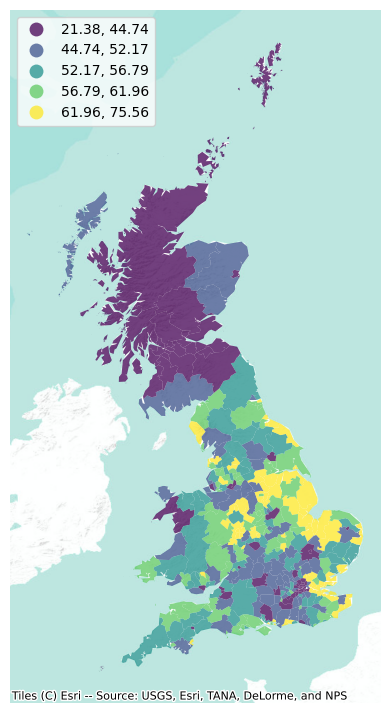

In [52]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(
    column="Pct_Leave",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds={"loc": 2},
    ax=ax,
)
contextily.add_basemap(
    ax,
    crs=db.crs,
    source=contextily.providers.Esri.WorldTerrain,
)
ax.set_axis_off()

## 2.3 Räumliche Gewichte und KNN-Visualisierung

Mit **KNN (k=8)** definieren wir für jede Region ihre 8 nächsten Nachbarn. Dies ist eine distanzbasierte Nachbarschaftsdefinition, die besonders bei irregulären Geometrien (wie hier: ungleichförmige Verwaltungsbezirke) sinnvoll ist.

Die Visualisierung zeigt:
- **Dunkelrote Punkte:** Zentroide (Mittelpunkte) der Verwaltungsbezirke
- **Blaue Linien:** KNN-Verbindungen (jeder Punkt zu seinen 8 nächsten Nachbarn)

In [ ]:
# W aus dem GeoDataFrame generieren
w = weights.KNN.from_dataframe(db, k=8)
# Zeilen-Standardisierung (Row-standardization)
w.transform = "R"

## 2.4 Spatial Lag und Moran-Analyse

Der **Spatial Lag** ist der räumlich gewichtete Durchschnitt der Nachbarwerte. Zwei Visualisierungen:
- **Links (% Leave):** Original-Abstimmungsergebnis
- **Rechts (% Leave - Spatial Lag):** Durchschnittlicher Abstimmungsanteil der Nachbarn

Der **Moran-Scatterplot** stellt:
- **x-Achse:** Standardisierte Werte (Abweichung vom Mittelwert)
- **y-Achse:** Standardisierte räumliche Lags (Nachbar-Abweichungen)

Die Steigung der Trendlinie entspricht Moran's I. Ein positiver Wert deutet darauf hin, dass ähnliche Werte räumlich geclustert sind.

In [54]:
db["Pct_Leave_lag"] = weights.spatial_lag.lag_spatial(
    w, db["Pct_Leave"]
)

In [55]:
db.loc[["E08000012", "S12000019"], ["Pct_Leave", "Pct_Leave_lag"]]

,Pct_Leave,Pct_Leave_lag
lad16cd,,
E08000012,41.81,54.61375
S12000019,37.94,38.01875


In [56]:
db["Pct_Leave_std"] = db["Pct_Leave"] - db["Pct_Leave"].mean()
db["Pct_Leave_lag_std"] = weights.lag_spatial(
    w, db["Pct_Leave_std"]
)

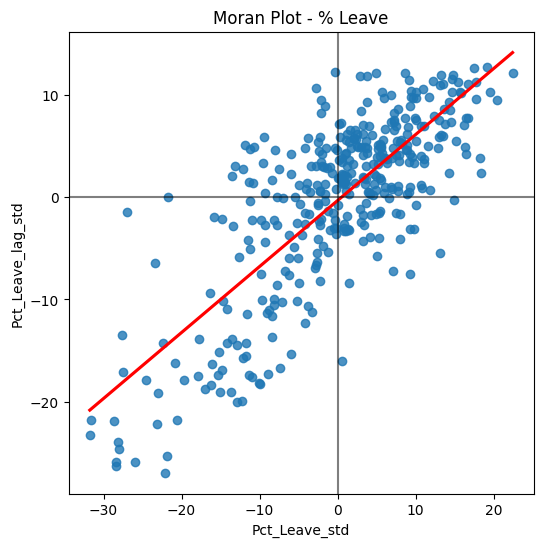

In [57]:
f, ax = plt.subplots(1, figsize=(6, 6))
seaborn.regplot(
    x="Pct_Leave_std",
    y="Pct_Leave_lag_std",
    ci=None,
    data=db,
    line_kws={"color": "r"},
)
ax.axvline(0, c="k", alpha=0.5)
ax.axhline(0, c="k", alpha=0.5)
ax.set_title("Moran Plot - % Leave")
plt.show()

## 2.5 Lokale Moran-Analyse

In Python können wir LISAs dank `esda` sehr effizient berechnen. Um lokale Moran-Statistiken zu berechnen, verwenden wir die Funktion `Moran_Local` (https://pysal.org/esda/generated/esda.Moran_Local.html):

In [ ]:
########### TODO: Ihre Implementierung hier ##############
lisa = 

Das `lisa`-Objekt speichert die lokalen Moran-Werte im Attribut `Is`. Wir visualisieren diese Verteilung nun mit einem Dichteplot:

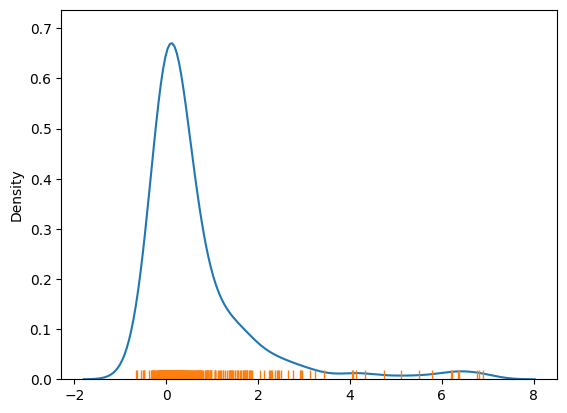

In [59]:
# KDE-Linie zeichnen (Kernel Density Estimation)
ax = seaborn.kdeplot(lisa.Is)
# Einen kleinen Strich (Rug) für jede Beobachtung hinzufügen
# entlang der horizontalen Achse
seaborn.rugplot(lisa.Is, ax=ax);

Die Verteilung zeigt, dass positive räumliche Assoziationen dominieren. Um die Ergebnisse sinnvoll zu interpretieren, kombinieren wir nun verschiedene Informationen:
1.  Die lokalen Moran-Werte.
2.  Die Quadranten (Cluster-Typen: HH, LL, HL, LH).
3.  Die statistische Signifikanz (p-Werte).

Mit der Bibliothek `splot` und `matplotlib` können wir diese Aspekte in einer übersichtlichen Grafik mit vier Karten darstellen:

In [60]:
from splot import esda as esdaplot

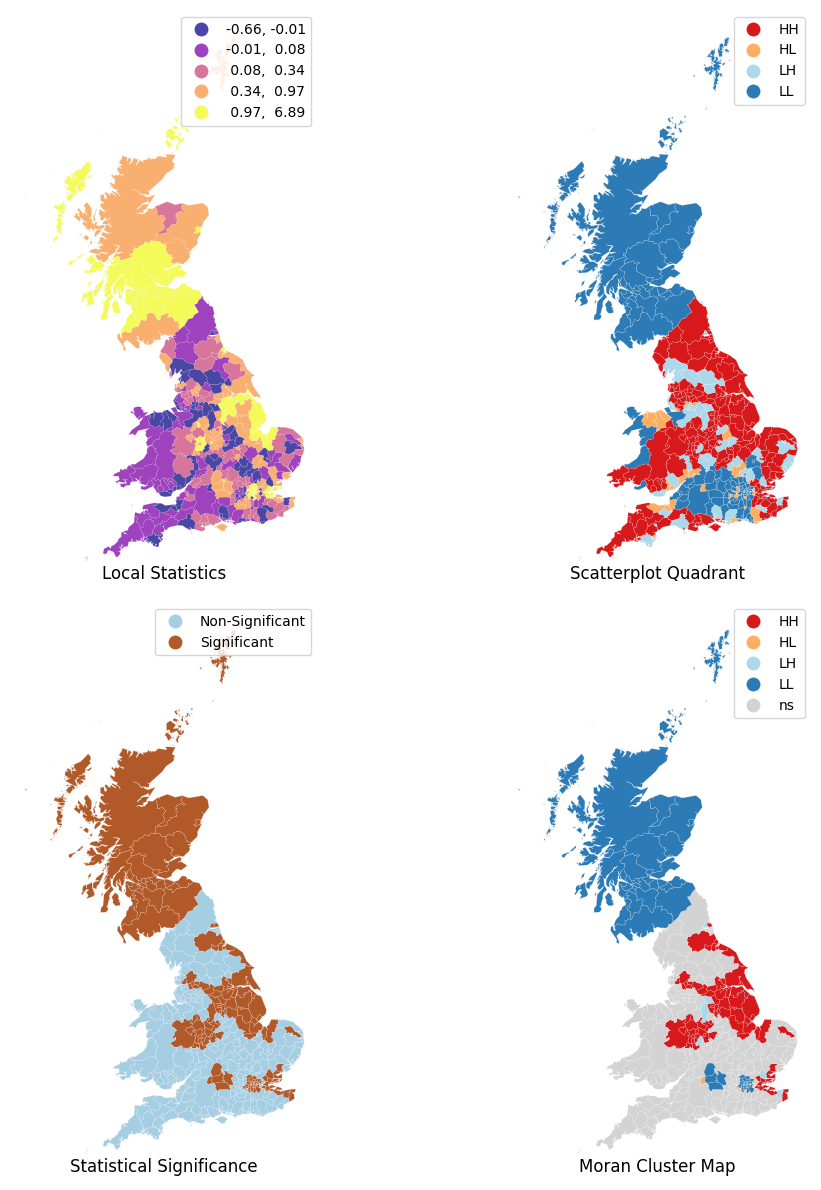

In [ ]:
# Abbildung und Achsen einrichten
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Achsen über einfachen Index zugänglich machen
axs = axs.flatten()

# Subplot 1 #
# Choroplethenkarte der lokalen Statistiken
# Erste Achse auswählen
ax = axs[0]
# Neue Spalte mit lokalen Statistiken on-the-fly zuweisen
db.assign(
    Is=lisa.Is
    # Choroplethenkarte der lokalen Statistiken plotten
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadranten-Kategorien
# Zweite Achse auswählen
ax = axs[1]
# Quadranten-Farben plotten (Hinweis: Um sicherzustellen, dass alle Polygone einem
# Quadranten zugewiesen werden, "tricksen" wir, indem wir das Signifikanzniveau auf
# 1 setzen, sodass alle Beobachtungen als "signifikant" behandelt und somit
# einer Quadrantenfarbe zugewiesen werden)
esdaplot.lisa_cluster(lisa, db, p=1, ax=ax)

# Subplot 3 #
# Signifikanzkarte
# Dritte Achse auswählen
ax = axs[2]
#
# Signifikante Beobachtungen finden
labels = pandas.Series(
    1 * (lisa.p_sim < 0.05),  # 1 zuweisen wenn signifikant, sonst 0
    index=db.index  # Den Index der Originaldaten verwenden
    # 1 zu "Signifikant" und 0 zu "Nicht signifikant" umkodieren
).map({1: "Signifikant", 0: "Nicht signifikant"})
# Labels on-the-fly zu `db` zuweisen
db.assign(
    cl=labels
    # Choroplethenkarte der (nicht-)signifikanten Gebiete plotten
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)

# Subplot 4 #
# Cluster-Karte
# Vierte Achse auswählen
ax = axs[3]
# Quadranten-Farben plotten. In diesem Fall verwenden wir ein 5% Signifikanzniveau,
# um Polygone auszuwählen, die Teil von statistisch signifikanten Clustern sind.
esdaplot.lisa_cluster(lisa, db, p=0.05, ax=ax)

# Abbildungs-Styling #
# Titel für jeden Subplot setzen
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Lokale Statistiken",
            "Scatterplot-Quadrant",
            "Statistische Signifikanz",
            "Moran Cluster-Karte",
        ][i],
        y=0,
    )
# Tight layout um Weißraum zu minimieren
f.tight_layout()

# Abbildung anzeigen
plt.show()

## 2.5 Getis-Ord Statistiken ($G_i$ und $G_i^*$)

Neben dem Local Moran's I gibt es weitere lokale Indikatoren für räumliche Assoziation. Eine häufig verwendete Familie sind die **Getis-Ord Statistiken**.

**Unterschied zu Moran's I:**
*   **Local Moran's I**: Kann sowohl Cluster (HH, LL) als auch Ausreißer (HL, LH) identifizieren.
*   **Getis-Ord ($G_i$ / $G_i^*$):** Konzentriert sich ausschließlich auf **positive räumliche Autokorrelation** (Cluster).
    *   Es identifiziert **Hotspots** (Cluster von hohen Werten).
    *   Es identifiziert **Coldspots** (Cluster von niedrigen Werten).
    *   Es kann *keine* räumlichen Ausreißer unterscheiden.

**Varianten:**
1.  **$G_i$ Statistik**: Berechnet den Zusammenhang der Nachbarn, *ohne* den Wert des Ortes selbst einzubeziehen.
2.  **$G_i^*$ Statistik (G-Star)**: Bezieht den Wert des Ortes selbst in die Berechnung mit ein.

**Interpretation:**
*   **Signifikant positive Werte**: Hotspot (hohe Werte umgeben von hohen Werten).
*   **Signifikant negative Werte**: Coldspot (niedrige Werte umgeben von niedrigen Werten).

Im Folgenden berechnen wir beide Varianten für die Brexit-Daten.

Informationen zu den Parametern finden Sie hier: https://pysal.org/esda/generated/esda.G_Local.html

In [ ]:
########### TODO: Ihre Implementierung hier ##############
# G_i berechnen
# go_i = 

# G_i* berechnen
# go_i_star = 

/Users/yufeng/opt/anaconda3/envs/open3d-ml/lib/python3.10/site-packages/esda/getisord.py:421: UserWarning: Gi* requested, but (a) weights are already row-standardized, (b) no weights are on the diagonal, and (c) no default value supplied to star. Assuming that the self-weight is equivalent to the maximum weight in the row. To use a different default (like, .5), set `star=.5`, or use libpysal.weights.fill_diagonal() to set the diagonal values of your weights matrix and use `star=None` in Gi_Local.
  w, star = _infer_star_and_structure_w(w, star, transform)


Die Ergebnisse der Getis-Ord-Statistik lassen sich am besten auf einer Karte darstellen.
Wichtig: Diese Statistik erkennt nur Cluster (positive Autokorrelation), keine Ausreißer.
- Hohe Werte deuten auf Hotspots hin.
- Niedrige Werte deuten auf Coldspots hin.

Da die Bibliothek `splot` hierfür keine direkte Funktion bietet, definieren wir eine eigene Funktion `g_map` zur Visualisierung.

In [ ]:
def g_map(g, db, ax):
    """
    Erstellt eine Cluster-Karte
    ...

    Argumente
    ---------
    g      : G_Local
             Objekt aus der Berechnung der G-Statistik
    db     : GeoDataFrame
             Tabelle, die mit den Werten in `g` ausgerichtet ist und
             die zu plottenden Geometrien enthält
    ax     : AxesSubplot
             `matplotlib`-Achse, auf der die Karte gezeichnet werden soll

    Rückgabe
    -------
    ax     : AxesSubplot
             Achse mit der gezeichneten Karte
    """
    ec = "0.8"

    # Beobachtungen in signifikant oder nicht unterteilen
    sig = g.p_sim < 0.05

    # Nicht-signifikante Cluster plotten
    ns = db.loc[sig == False, "geometry"]
    ns.plot(ax=ax, color="lightgrey", edgecolor=ec, linewidth=0.1)
    # HH-Cluster (Hotspots) plotten
    hh = db.loc[(g.Zs > 0) & (sig == True), "geometry"]
    hh.plot(ax=ax, color="red", edgecolor=ec, linewidth=0.1)
    # LL-Cluster (Coldspots) plotten
    ll = db.loc[(g.Zs < 0) & (sig == True), "geometry"]
    ll.plot(ax=ax, color="blue", edgecolor=ec, linewidth=0.1)
    # Styling und Zeichnen
    contextily.add_basemap(
        ax,
        crs=db.crs,
        source=contextily.providers.Esri.WorldTerrain,
    )
    # Flag, um einen Stern zum Titel hinzuzufügen, wenn es G_i* ist
    st = ""
    if g.star:
        st = "*"
    # Titel hinzufügen
    ax.set_title(f"G{st} Statistik für Anteil Leave-Stimmen", size=15)
    # Achse aus ästhetischen Gründen entfernen
    ax.set_axis_off()
    return ax

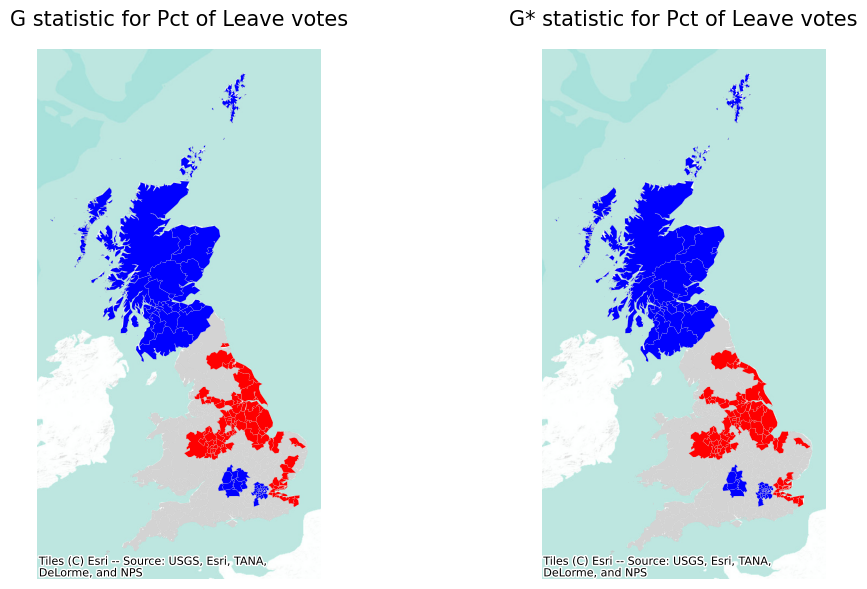

In [ ]:
# Getis-Ord G_i und G_i* berechnen
lg = esda.G_Local(db["Pct_Leave"], w, transform="B")
lg_star = esda.G_Local(db["Pct_Leave"], w, transform="B", star=True)

# Abbildung und Achsen einrichten
f, axs = plt.subplots(1, 2, figsize=(12, 6))

# G_i auf der linken Achse plotten
g_map(lg, db, axs[0])

# G_i* auf der rechten Achse plotten
g_map(lg_star, db, axs[1])

# Abbildung anzeigen
plt.show()

# Referenz
- Local Spatial Autocorrelation — Geographic Data Science with Python: https://geographicdata.science/book/notebooks/07_local_autocorrelation.html#local-moran-s-i-i (CC BY-NC-ND 4.0)